## Analiza komunikacji miejskiej we Wrocławiu


**Tworzenie sieci**

In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
import collections

In [2]:
def create_graph_from(lines):
    data = pd.DataFrame( columns=['source', 'target', 'delta_time', 'line_name' ])
    for index, line in enumerate(lines):
        tree = ET.parse(f'data/XML-rozkladyjazdy/{line}/{line}.xml')
        root = tree.getroot()
        czasy_list = []
        if line.isdigit():
            line_name = str(int(line))
        else:
            line_name = line
        linia = root.find('linia')
        wariant = linia.find('wariant')
        przystanek = wariant.find('przystanek')
        czasy = przystanek.find('czasy')
        for przystanek_czas in czasy.findall('przystanek'):
            czasy_list.append({
                                'nazwa': przystanek_czas.get('nazwa'),
                                 'czas': przystanek_czas.get('czas')})
        df = pd.DataFrame(czasy_list)
        df['czas'] = df['czas'].fillna(0).astype(int)
        df['source'] = df['nazwa'].shift(1)
        df['target'] = df['nazwa']
        df['delta_time'] = df['czas'] - df['czas'].shift(1)
        df.dropna(inplace=True)
        df = df.drop(['nazwa','czas'], axis=1)
        df['line_name'] = line_name
        data = pd.concat([data, df], axis=0)
    return data

In [3]:
import os
line_names = []
for path, subdirs, files in os.walk("data"):
    for name in files:
        line_names.append(name[:4])

print(line_names)

df = create_graph_from(line_names)
print(df.columns)

['0001', '0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0015', '0016', '0017', '0020', '0023', '0031', '0032', '0033', '0070', '0074', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '000a', '000c', '000d', '000k', '000n', '0010', '0011', '0015', '0016', '0017', '0020', '0023', '0031', '0032', '0033', '0070', '0074', '0100', '0101', '0102', '0103', '0104', '0105', '0106', '0107', '0108', '0109', '0110', '0111', '0112', '0113', '0114', '0115', '0116', '0117', '0118', '0119', '0120', '0121', '0122', '0123', '0124', '0125', '0126', '0127', '0128', '0129', '0130', '0131', '0132', '0133', '0134', '0136', '0137', '0138', '0140', '0142', '0143', '0144', '0145', '0146', '0147', '0148', '0149', '0150', '0151', '0206', '0240', '0241', '0242', '0243', '0244', '0245', '0246', '0247', '0248', '0249', '0250', '0251', '0253', '0255', '0257', '0259', '0315', '0319', '0345', '0602', '0607', '0612', '0714', '0716', '0903', '0904', '0907', '0908',

In [4]:
mpk_graph = nx.from_pandas_edgelist(df, 'source', 'target', edge_attr=['delta_time', 'line_name'], create_using=nx.MultiDiGraph())

mpk_graph.edges()

# for i in range(len(df)-1):
#     G.add_edge(df['nazwa'][i], df['nazwa'][i+1])
# print(G)
# wyświetl informacje o grafie
#print(nx.info(G))

OutMultiEdgeDataView([('POŚWIĘTNE', 'Wołowska'), ('POŚWIĘTNE', 'Wołowska'), ('POŚWIĘTNE', 'Wołowska'), ('POŚWIĘTNE', 'Wołowska'), ('POŚWIĘTNE', 'Wołowska'), ('POŚWIĘTNE', 'Wołowska'), ('POŚWIĘTNE', 'Wołowska'), ('POŚWIĘTNE', 'Wołowska'), ('POŚWIĘTNE', 'Wołowska'), ('POŚWIĘTNE', 'Wołowska'), ('POŚWIĘTNE', 'Żmigrodzka (Obwodnica)'), ('Wołowska', 'Kępińska'), ('Wołowska', 'Kępińska'), ('Wołowska', 'Kępińska'), ('Wołowska', 'Kępińska'), ('Wołowska', 'Kępińska'), ('Wołowska', 'Kępińska'), ('Wołowska', 'Kępińska'), ('Wołowska', 'Kępińska'), ('Wołowska', 'Kępińska'), ('Wołowska', 'Kępińska'), ('Wołowska', 'POŚWIĘTNE'), ('Kępińska', 'Kamieńskiego'), ('Kępińska', 'Kamieńskiego'), ('Kępińska', 'Kamieńskiego'), ('Kępińska', 'Kamieńskiego'), ('Kępińska', 'Kamieńskiego'), ('Kępińska', 'Kamieńskiego'), ('Kępińska', 'Kamieńskiego'), ('Kępińska', 'Kamieńskiego'), ('Kępińska', 'Kamieńskiego'), ('Kępińska', 'Kamieńskiego'), ('Kępińska', 'Wołowska'), ('Kamieńskiego', 'Broniewskiego'), ('Kamieńskiego', 'B

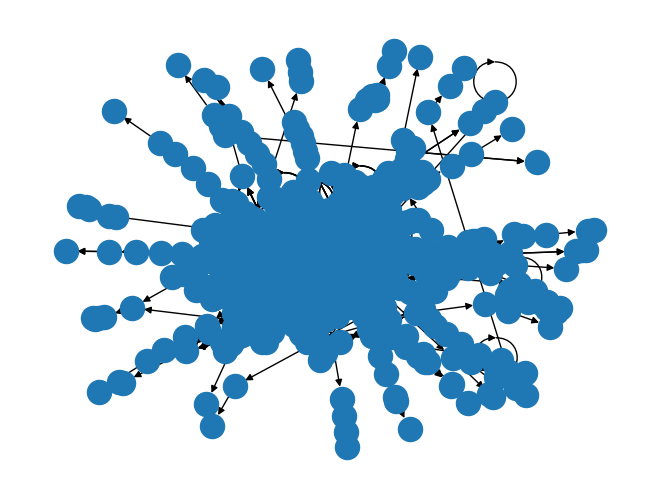

In [5]:
nx.draw(mpk_graph) # no troche do dupy to wygląda póki co ale chyba działa

# Analiza sieci

In [6]:

print('Liczba węzłów', end=': ')
print(len(mpk_graph.nodes()))


print('Liczba krawędzi', end=': ')
print(len(mpk_graph.edges()))


print('Czy jest silnie połączony?', end=': ')
print(nx.is_strongly_connected(mpk_graph))


print('Czy jest słabo połączony?', end=': ')
print(nx.is_weakly_connected(mpk_graph))

Liczba węzłów: 839
Liczba krawędzi: 3843
Czy jest silnie połączony?: False
Czy jest słabo połączony?: True


## Trzej królowie

Analiza stopni

Średni stopień węzła: 9.16


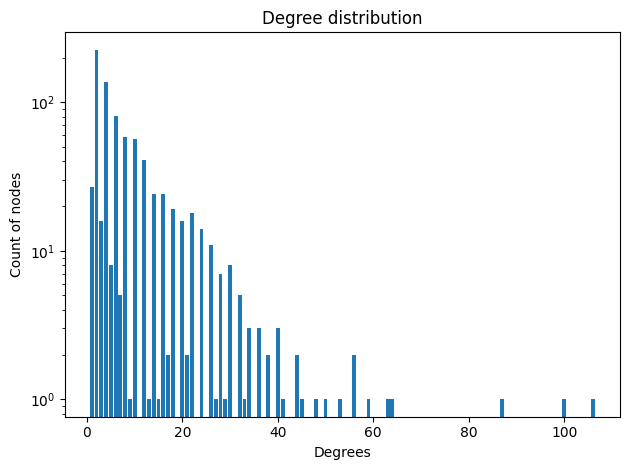

In [7]:
print('Średni stopień węzła', end=': ')
print('{:.2f}'.format(sum([x[1] for x in mpk_graph.degree()])/len(mpk_graph.degree())))

deg_count = dict(collections.Counter(sorted([d for n, d in mpk_graph.degree()])))

plt.bar(deg_count.keys(), deg_count.values())
plt.yscale('log')
plt.title('Degree distribution')
plt.xlabel('Degrees')
plt.ylabel('Count of nodes')
plt.tight_layout()



Analiza ścieżek (z wagą)

(Badanie dla grafu nieskierowanego, bo mpk_graph jest słabo połączony)

Średnia długość: 41.66 min
Średnica: 146.0 min


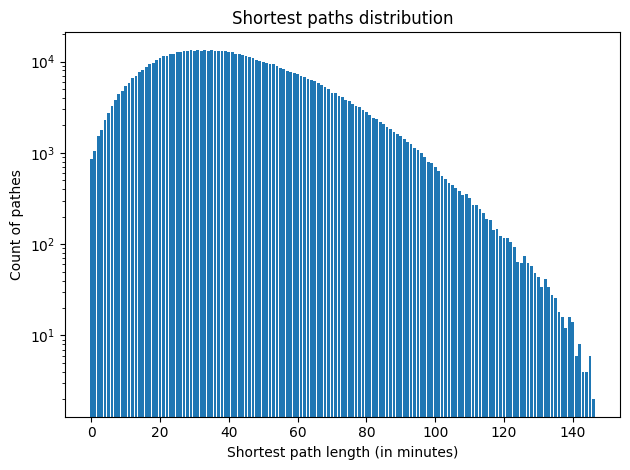

In [17]:
def flatten(l):
    return [item for sublist in l for item in sublist]

print('Średnia długość', end=': ')
print(round(nx.average_shortest_path_length(nx.Graph(mpk_graph), weight='delta_time'),2), 'min')

print('Średnica', end=': ')
print(round(nx.diameter(nx.Graph(mpk_graph), weight='delta_time'),2), 'min')

short_path = flatten([list(x[1].values()) for x in nx.shortest_path_length(nx.Graph(mpk_graph), weight='delta_time')])
short_path_count = dict(collections.Counter(sorted([d for d in short_path])))

plt.bar(short_path_count.keys(), short_path_count.values(), width=0.8)
plt.yscale('log')
plt.title('Shortest paths distribution')
plt.xlabel('Shortest path length (in minutes)')
plt.ylabel('Count of pathes')
plt.tight_layout()

Wspóczynnik grupowania

(Badanie dla grafu skierowanego nie multi)

Globalne grupowanie: 0.06


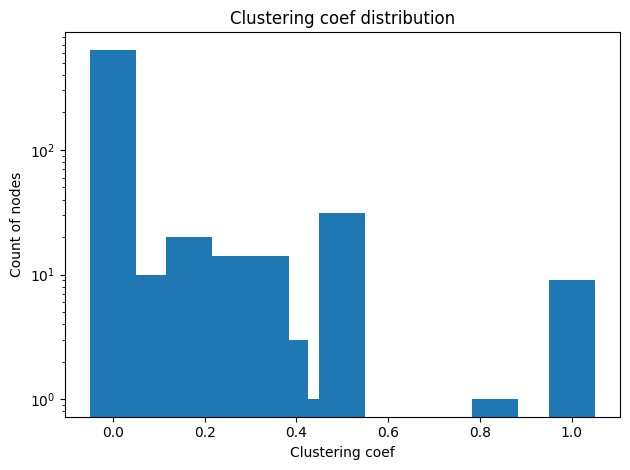

In [9]:
print('Globalne grupowanie', end=': ')
print(round(nx.average_clustering(nx.DiGraph(mpk_graph)), 2))

clustering_count = dict(collections.Counter(sorted([d[1] for d in nx.clustering(nx.DiGraph(mpk_graph)).items()])))

plt.bar(clustering_count.keys(), clustering_count.values(), width=0.1)
plt.yscale('log')
plt.title('Clustering coef distribution')
plt.xlabel('Clustering coef')
plt.ylabel('Count of nodes')
plt.tight_layout()

## Centrality

Betweennes

Sredni betweenness: 0.02


Text(0, 0.5, 'Count of nodes')

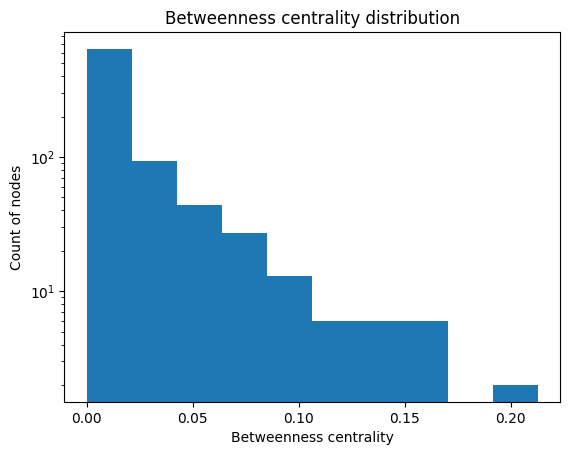

In [10]:
betweenness = nx.betweenness_centrality(mpk_graph)

print('Sredni betweenness', end=': ')
print(round(sum(betweenness.values())/len(betweenness), 2))


plt.hist(betweenness.values())
plt.yscale('log')
plt.title('Betweenness centrality distribution')
plt.xlabel('Betweenness centrality')
plt.ylabel('Count of nodes')

## Pagerank

Sredni pagerank: 0.0


Text(0, 0.5, 'Count of nodes')

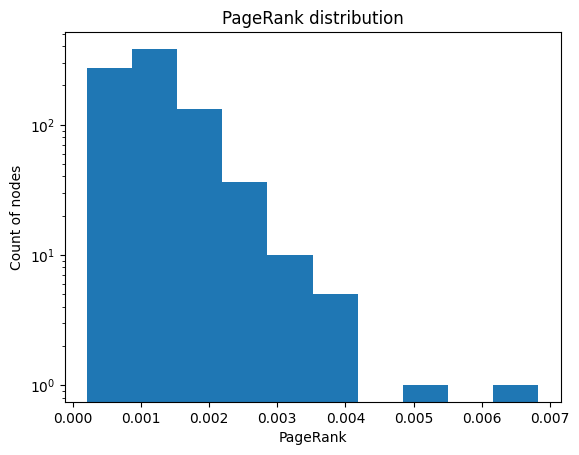

In [11]:
pageranks = nx.pagerank(mpk_graph)

print('Sredni pagerank', end=': ')
print(round(sum(pageranks.values())/len(pageranks), 2))


plt.hist(pageranks.values())
plt.yscale('log')
plt.title('PageRank distribution')
plt.xlabel('PageRank')
plt.ylabel('Count of nodes')

## Closeness

Największy closeness: 0.0241
Średni closeness: 0.016


Text(0, 0.5, 'Count of nodes')

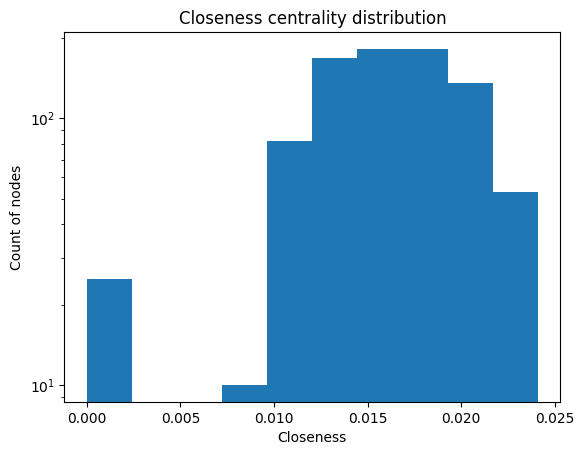

In [12]:
closeness = nx.closeness_centrality(mpk_graph, distance='delta_time')

print('Największy closeness', end=': ')
print(round(max(closeness.values()), 4))

print('Średni closeness', end=': ')
print(round(sum(closeness.values())/len(closeness), 4))


plt.hist(closeness.values())
plt.yscale('log')
plt.title('Closeness centrality distribution')
plt.xlabel('Closeness')
plt.ylabel('Count of nodes')

# Wizualizacja 

Badanie layoutów

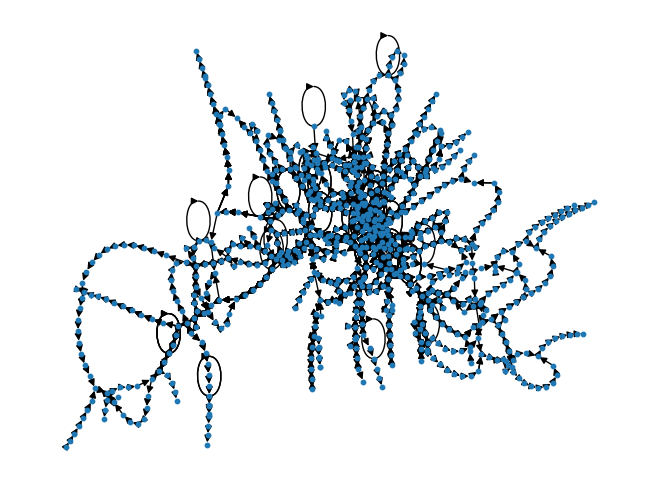

In [13]:
pos = nx.kamada_kawai_layout(mpk_graph)
nx.draw(mpk_graph, pos=pos, node_size = 10 )

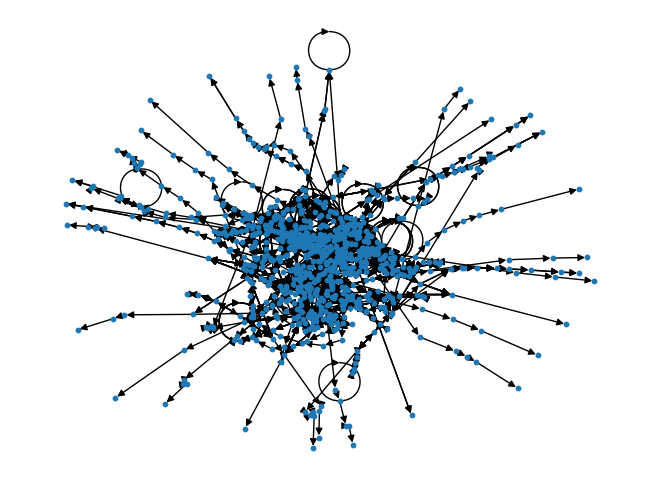

In [14]:
pos = nx.spring_layout(mpk_graph)
nx.draw(mpk_graph, pos=pos, node_size = 10 )